Enable notebook to graph inline

In [2]:
%matplotlib inline

Import dependancies.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

## Import 17lands data

Define data types for importing 17lands data.

In [5]:
MAX_MULLIGANS = 7
MAX_TURNS = 30

BASE_COLS = {
    'draft_id': str,
    'history_id': int,
    'time': str,
    'expansion': str,
    'format': str,
    'user_rank': str,
    'oppo_rank': str,
    'game_index': 'int8',
    'user_deck_colors': str,
    'oppo_deck_colors': str,
    'user_mulligans': 'int8',
    'oppo_mulligans': 'int8',
    'on_play': bool,
    'turns': 'int8',
    'won': bool,
    'missing_diffs': 'int8',
}

PER_TURN_COLS = {
    'cards_drawn': str,
    'cards_discarded': str,
    'lands_played': str,
    'cards_foretold': str,
    'creatures_cast': str,
    'non_creatures_cast': str,
    'user_instants_sorceries_cast': str,
    'oppo_instants_sorceries_cast': str,
    'user_abilities': str,
    'oppo_abilities': str,
    'user_cards_learned': str,
    'oppo_cards_learned': str,
    'creatures_attacked': str,
    'creatures_blocked': str,
    'creatures_unblocked': str,
    'creatures_blocking': str,
    'player_combat_damage_dealt': 'int8',
    'user_creatures_killed_combat': str,
    'oppo_creatures_killed_combat': str,
    'user_creatures_killed_non_combat': str,
    'oppo_creatures_killed_non_combat': str,
    'user_mana_spent': 'int8',
    'oppo_mana_spent': 'int8',
    'eot_user_cards_in_hand': str,
    'eot_oppo_cards_in_hand': str,
    'eot_user_lands_in_play': str,
    'eot_oppo_lands_in_play': str,
    'eot_user_creatures_in_play': str,
    'eot_oppo_creatures_in_play': str,
    'eot_user_non_creatures_in_play': str,
    'eot_oppo_non_creatures_in_play': str,
    'eot_user_life': 'int8',
    'eot_oppo_life': 'int8',
}

SUMMARY_COLS = {
    'cards_drawn': 'int8',
    'cards_discarded': 'int8',
    'lands_played': 'int8',
    'cards_foretold': 'int8',
    'creatures_cast': 'int8',
    'non_creatures_cast': 'int8',
    'instants_sorceries_cast': 'int8',
    'cards_learned': 'int8',
    'mana_spent': 'int16',
}

def get_dtypes():
    dtypes = BASE_COLS.copy()

    for x in range(1, MAX_MULLIGANS+1):
        dtypes[f'candidate_hand_{x}'] = str
    dtypes['opening_hand'] = str

    for turn in range(1, MAX_TURNS+1):
        for player in ['user', 'oppo']:
            for k, v in PER_TURN_COLS.items():
                dtypes[f'{player}_turn_{turn}_{k}'] = v
            dtypes[f'{player}_turn_{turn}_eot_oppo_cards_in_hand'] = 'int8'
        dtypes[f'oppo_turn_{turn}_cards_drawn'] = 'int8'

    for player in ['user', 'oppo']:
        for col in SUMMARY_COLS:
            dtypes[f'{player}_total_{col}'] = 'int8'

    return dtypes

Load 17lands data into dataframe.

In [6]:
MID_DATA = "game_data_public.MID.PremierDraft.csv"
df = pd.read_csv(MID_DATA, dtype=get_dtypes())

/Users/dommil/Documents/projects/dafter/jupyter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
df.info(max_cols=1106)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396345 entries, 0 to 396344
Data columns (total 1106 columns):
 #     Column                                       Non-Null Count   Dtype  
---    ------                                       --------------   -----  
 0     user_win_rate_bucket                         396345 non-null  float64
 1     user_n_games_bucket                          396345 non-null  int64  
 2     draft_id                                     396345 non-null  object 
 3     build_index                                  396345 non-null  int64  
 4     draft_time                                   396345 non-null  object 
 5     expansion                                    396345 non-null  object 
 6     event_type                                   396345 non-null  object 
 7     game_number                                  396345 non-null  int64  
 8     rank                                         390226 non-null  object 
 9     opp_rank                         

Select columns that describe what cards are in the deck.

In [63]:
num_rows = 1000
deck = df.iloc[0:num_rows,562:834].copy()

In [64]:
# define transform
svd = TruncatedSVD()
# prepare transform on dataset
svd.fit(deck)
# apply transform to dataset
transformed = svd.transform(deck)
#change to a DataFrame
t = pd.DataFrame(data=transformed, columns=['a','b'])

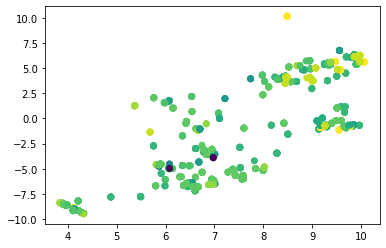

In [65]:
#C parameter is the winrate of deck
plt.scatter(t['a'], t['b'], c=df.iloc[0:num_rows,0], cmap='viridis')

In [67]:
t[t['a'] > 9]

,a,b
16,9.906455,5.548409
17,9.906455,5.548409
18,9.906455,5.548409
19,9.906455,5.548409
20,9.906455,5.548409
...,...,...
995,9.972366,5.651966
996,9.972366,5.651966
997,9.972366,5.651966
998,9.972366,5.651966


In [71]:
"""Create a histogram of the average number of cards within a given cluster of transform 't' defined by the boundries amin, amax, bmin and bmax"""
card_avg_hist(t, amin, amax, bmin, bmax):
    t = t[t['a']>amin]
    t = t[t['a']<amax]
    t = t[t['b']>bmin]
    t = t[t['b']<bmax]

user_win_rate_bucket                                          0.52
user_n_games_bucket                                             50
draft_id                          5cb857ec16be480585d148eafc459f70
build_index                                                      0
draft_time                                     2021-10-01 03:30:54
                                                ...               
sideboard_Voldaren Stinger                                       0
sideboard_Wake to Slaughter                                      0
sideboard_Willow Geist                                           0
sideboard_Winterthorn Blessing                                   0
sideboard_Wrenn and Seven                                        0
Name: 16, Length: 1106, dtype: object